<a href="https://colab.research.google.com/github/Sitta250/pytorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### classification

In [ ]:

# from google.colab import auth
# auth.authenticate_user()

# !git config --global user.email "sitta.uttangkat_ext@michelin.com"
# !git config --global user.name "Sitta Uttangkat"

In [ ]:
# !git clone https://github.com/Sitta250/pytorch.git

### make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
# make 1000 sample
n_samples = 1000

# create circle
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X:\n {X[:5]}")
print(f"first 5 samples of y:\n {y[:5]}")

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


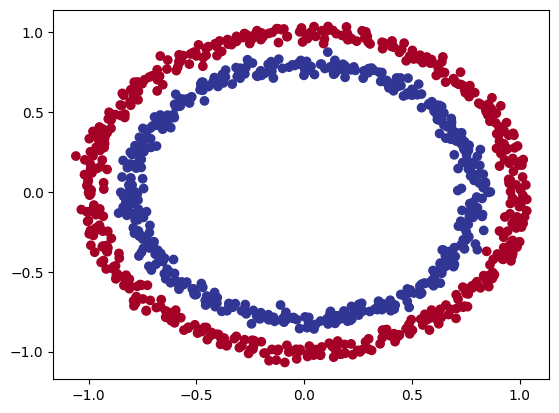

In [ ]:
# visualization
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 check input and output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# view first example
X_sample = X[0]
y_sample = y[0]
print(f"sample of X: {X_sample}")
print(f"sample of y: {y_sample}")

sample of X: [0.75424625 0.23148074]
sample of y: 1


### turn data into tensor

In [ ]:
import torch

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### building model

to classify red and blue dots, we need to:
1. set up device agonistic code
2. construct a model by nn.Module
3. define a loss funciton and optimizer
4. create test loop

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

### create a model
1. subclass nn.Module
2. create 2 nn.Linear() capable of handling the shapes of data
3. define forward() that outline forward pass
4. instantiate an instance of our model class and send it to target device

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
y_train.shape, y_train[:5]

(torch.Size([800]), tensor([1., 0., 0., 0., 1.]))

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #take 2 give out 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #take 5 give out 1
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )
  def forward(self, x):
    return self.layer_2(self.layer_1(x))
    # return self.two_linear_layers(x)
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"length of test sample: {len(X_test)}, shape{X_test.shape}")
print(f"\nfirst 100 predictions:\n {torch.round(untrained_preds[:10])}")
print(f"\nfirst 10 label:\n {y_test[:10]}")

length of predictions: 200, shape: torch.Size([200, 1])
length of test sample: 200, shapetorch.Size([200, 2])

first 100 predictions:
 tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

first 10 label:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
 X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))* 100
  return acc

### training model
need to build training loop:

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer step

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#use sigmoid activation function on model logits to turn hem into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

 ### raw logits -> prediction probabilities -> prediction labels

In [ ]:
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### building and testing loop


In [ ]:
torch.manual_seed(42)
epochs = 500
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### training
  model_0.train()

  # 1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate loss/ accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. calculate test loss/ acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch %50 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:2f} | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f} ")

Epoch: 0 | Loss: 0.69796, Acc: 51.875000 | Test loss: 0.69440, Test acc:58.00 
Epoch: 50 | Loss: 0.69378, Acc: 50.250000 | Test loss: 0.69234, Test acc:50.00 
Epoch: 100 | Loss: 0.69331, Acc: 49.250000 | Test loss: 0.69271, Test acc:53.00 
Epoch: 150 | Loss: 0.69317, Acc: 52.250000 | Test loss: 0.69307, Test acc:51.00 
Epoch: 200 | Loss: 0.69310, Acc: 50.875000 | Test loss: 0.69336, Test acc:49.00 
Epoch: 250 | Loss: 0.69306, Acc: 51.125000 | Test loss: 0.69358, Test acc:48.00 
Epoch: 300 | Loss: 0.69304, Acc: 51.125000 | Test loss: 0.69376, Test acc:46.50 
Epoch: 350 | Loss: 0.69302, Acc: 51.000000 | Test loss: 0.69391, Test acc:46.00 
Epoch: 400 | Loss: 0.69301, Acc: 51.250000 | Test loss: 0.69403, Test acc:47.50 
Epoch: 450 | Loss: 0.69300, Acc: 50.875000 | Test loss: 0.69414, Test acc:47.00 


### make predictions and evaluate the model

from the result, it seems like the model is not learning anythin
so to inspect, we have to make predictions and visualize them

we will use plot_decisoin_boundary()

In [ ]:
import requests
from pathlib import Path
#download helper function if not downloaded already
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

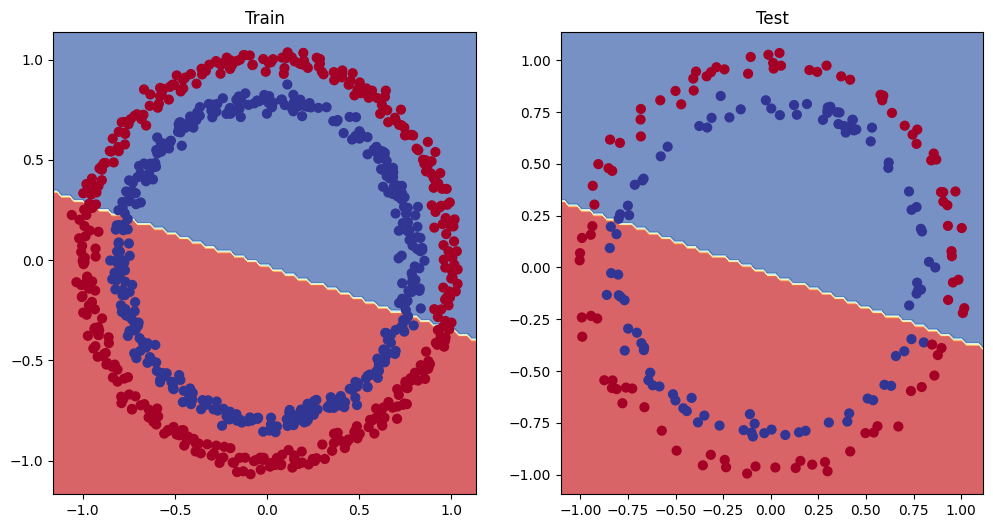

In [ ]:
# plot decision boudary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### improving model (from model perspective)
- add more layers: more chances to learn about pattern in data
- add more hidden units: from 5 hidden units, we can do 10
- fit for longer
- change the activation function
- change learning rate
- change loss function

these values are call hyperparameters because we can adjust these value.
here, we will:
- add more units 5->10
- increase numbers of layer 2->3
-increase number of epochs 100->1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs =1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch %100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:2f} | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f} ")

Epoch: 0 | Loss: 0.69396, Acc: 50.875000 | Test loss: 0.69261, Test acc:51.00 
Epoch: 100 | Loss: 0.69305, Acc: 50.375000 | Test loss: 0.69379, Test acc:48.00 
Epoch: 200 | Loss: 0.69299, Acc: 51.125000 | Test loss: 0.69437, Test acc:46.00 
Epoch: 300 | Loss: 0.69298, Acc: 51.625000 | Test loss: 0.69458, Test acc:45.00 
Epoch: 400 | Loss: 0.69298, Acc: 51.125000 | Test loss: 0.69465, Test acc:46.00 
Epoch: 500 | Loss: 0.69298, Acc: 51.000000 | Test loss: 0.69467, Test acc:46.00 
Epoch: 600 | Loss: 0.69298, Acc: 51.000000 | Test loss: 0.69468, Test acc:46.00 
Epoch: 700 | Loss: 0.69298, Acc: 51.000000 | Test loss: 0.69468, Test acc:46.00 
Epoch: 800 | Loss: 0.69298, Acc: 51.000000 | Test loss: 0.69468, Test acc:46.00 
Epoch: 900 | Loss: 0.69298, Acc: 51.000000 | Test loss: 0.69468, Test acc:46.00 


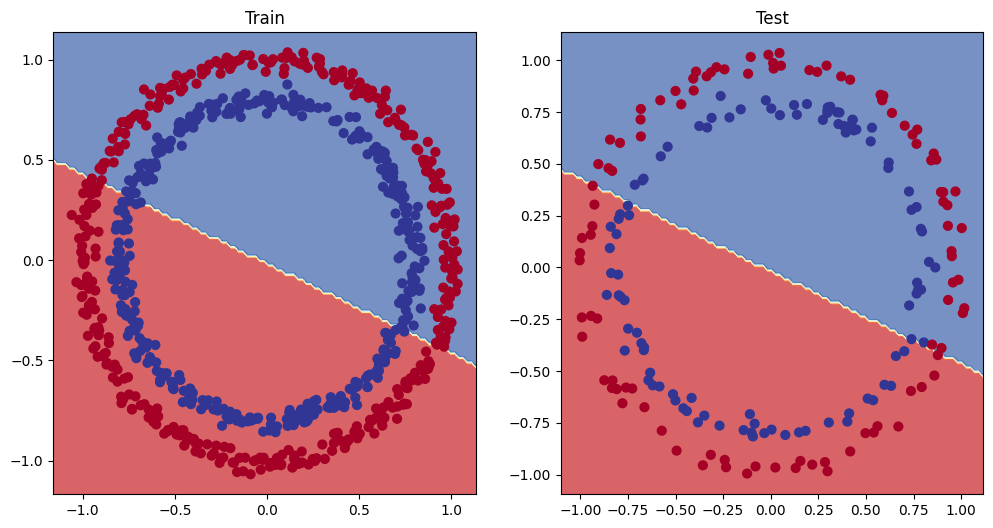

In [ ]:
# plot decision boudary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### test to see if model can fit straight line
- testing out small problem before working with big problem

In [ ]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#create train and test split

train_split = int(0.8 *len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

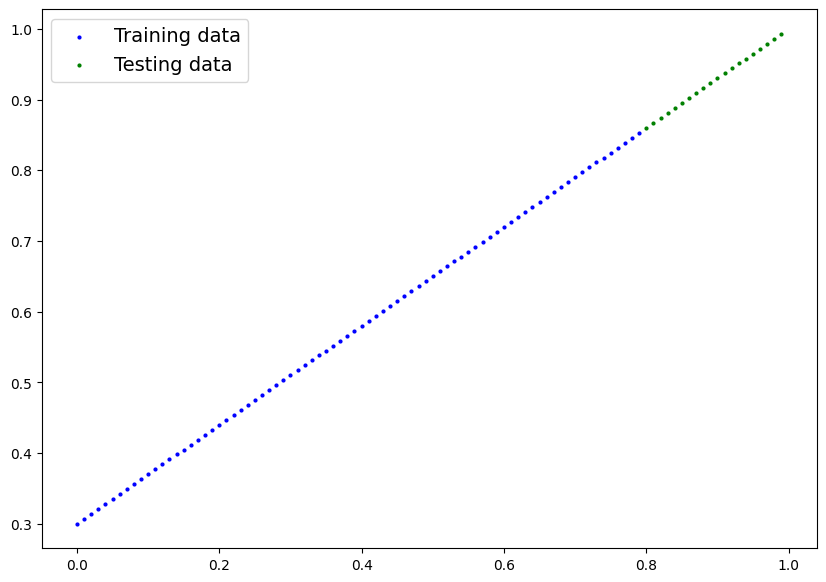

In [ ]:
plot_predictions(train_data = X_train_regression,
                train_labels = y_train_regression,
                test_data = X_test_regression,
                test_labels =y_test_regression)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# same architecture as model 1, but diff nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and opt

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
# train
torch.manual_seed(42)
epochs = 1000
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch %100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")



Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


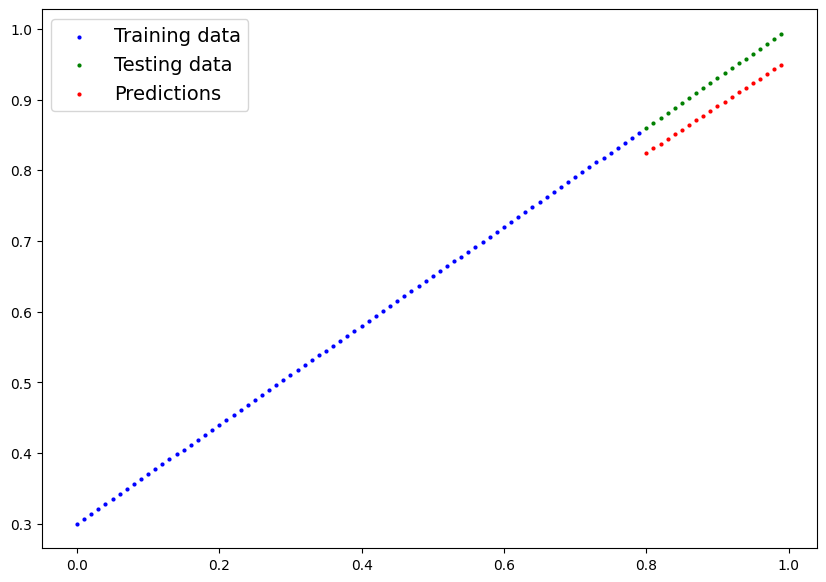

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels = y_test_regression,
                 predictions=y_preds)

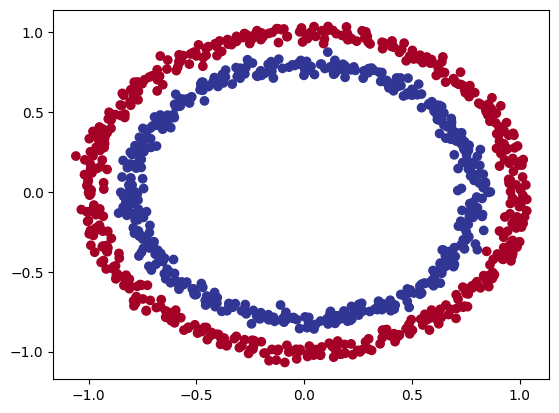

In [ ]:
# non linear data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# convert data to tensor
import torch
from sklearn.model_selection import train_test_split

# turn to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
# building model with non-linearity
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activaiton function

  def forward(self, X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

# 12:11

In [ ]:
# setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
# random seed
torch.manual_seed(42)
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
               y_pred = y_pred)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred=test_pred)
  if epoch %100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:2f} | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f} ")


Epoch: 0 | Loss: 0.69295, Acc: 50.000000 | Test loss: 0.69319, Test acc:50.00 
Epoch: 100 | Loss: 0.69115, Acc: 52.875000 | Test loss: 0.69102, Test acc:52.50 
Epoch: 200 | Loss: 0.68977, Acc: 53.375000 | Test loss: 0.68940, Test acc:55.00 
Epoch: 300 | Loss: 0.68795, Acc: 53.000000 | Test loss: 0.68723, Test acc:56.00 
Epoch: 400 | Loss: 0.68517, Acc: 52.750000 | Test loss: 0.68411, Test acc:56.50 
Epoch: 500 | Loss: 0.68102, Acc: 52.750000 | Test loss: 0.67941, Test acc:56.50 
Epoch: 600 | Loss: 0.67515, Acc: 54.500000 | Test loss: 0.67285, Test acc:56.00 
Epoch: 700 | Loss: 0.66659, Acc: 58.375000 | Test loss: 0.66322, Test acc:59.00 
Epoch: 800 | Loss: 0.65160, Acc: 64.000000 | Test loss: 0.64757, Test acc:67.50 
Epoch: 900 | Loss: 0.62362, Acc: 74.000000 | Test loss: 0.62145, Test acc:79.00 


In [ ]:
# evaluate model
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

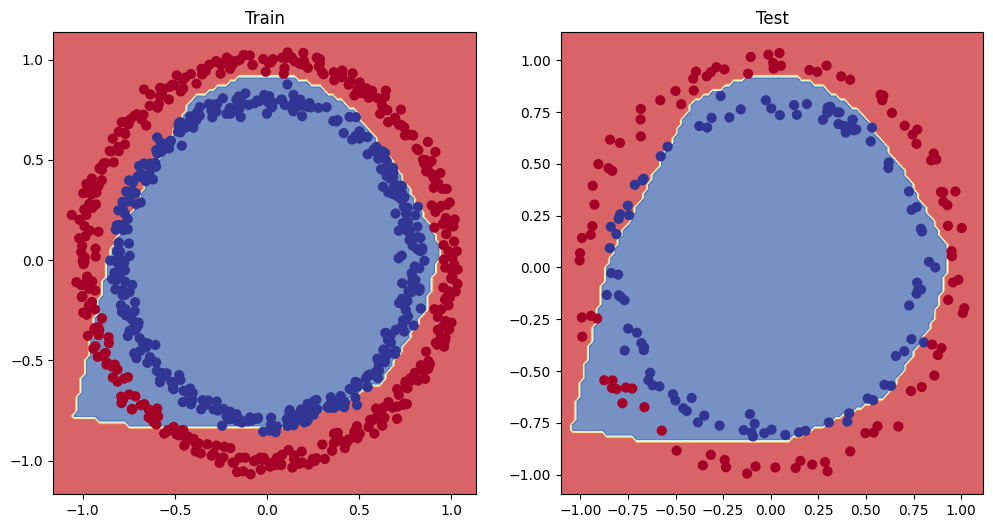

In [ ]:
# plot decision
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
# improve model3 to do better than 80% accuracy

In [ ]:
# try adding more layer
from torch import nn
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  def forward(self, X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_4 = CircleModelV3().to(device)
model_4

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs =2000
for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred= test_pred)
    if epoch %100 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:2f} | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f} ")

Epoch: 0 | Loss: 0.69295, Acc: 50.000000 | Test loss: 0.69319, Test acc:50.00 
Epoch: 100 | Loss: 0.69115, Acc: 52.875000 | Test loss: 0.69102, Test acc:52.50 
Epoch: 200 | Loss: 0.68977, Acc: 53.375000 | Test loss: 0.68940, Test acc:55.00 
Epoch: 300 | Loss: 0.68795, Acc: 53.000000 | Test loss: 0.68723, Test acc:56.00 
Epoch: 400 | Loss: 0.68517, Acc: 52.750000 | Test loss: 0.68411, Test acc:56.50 
Epoch: 500 | Loss: 0.68102, Acc: 52.750000 | Test loss: 0.67941, Test acc:56.50 
Epoch: 600 | Loss: 0.67515, Acc: 54.500000 | Test loss: 0.67285, Test acc:56.00 
Epoch: 700 | Loss: 0.66659, Acc: 58.375000 | Test loss: 0.66322, Test acc:59.00 
Epoch: 800 | Loss: 0.65160, Acc: 64.000000 | Test loss: 0.64757, Test acc:67.50 
Epoch: 900 | Loss: 0.62362, Acc: 74.000000 | Test loss: 0.62145, Test acc:79.00 
Epoch: 1000 | Loss: 0.56818, Acc: 87.750000 | Test loss: 0.57378, Test acc:86.50 
Epoch: 1100 | Loss: 0.48153, Acc: 93.500000 | Test loss: 0.49935, Test acc:90.50 
Epoch: 1200 | Loss: 0.37056,

In [ ]:
plt.plot(figsize=(12,6))
plt.title("Improved version")
plot_decision_boundary(model_4, X_train, y_train)



In [ ]:
# replicating non-linear activation funcions

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

In [ ]:
plt.plot(A)

### visualizing relu

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
A

In [ ]:
def relu(X: torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0), X)
relu(A)

In [ ]:
plt.plot(relu(A))

### visualizing sigmoid

In [ ]:
def sigmoid(X):
  return 1/(1+torch.exp(-X))

In [ ]:
plt.plot(torch.sigmoid(A))

In [ ]:
plt.plot(sigmoid(A))

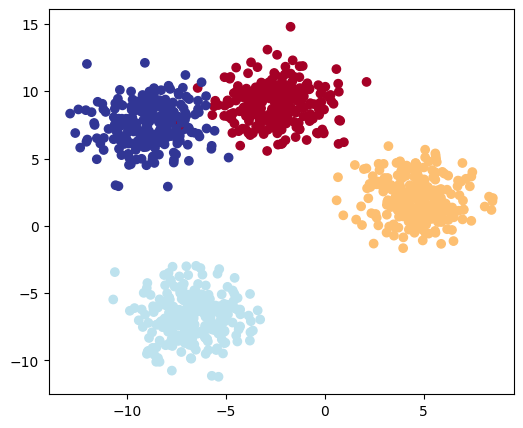

In [ ]:
### multi-class classification
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# split data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state= RANDOM_SEED)


# visualize
plt.figure(figsize=(6, 5))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


In [ ]:
from torch import nn

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ initializes multi-class classification model
    args:
      input_features: number of input features
      output_features: number of output features
      hidden_units: number of hidden units
      """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )
  def forward(self, X):
    return self.linear_layer_stack(X)
# create instance
model_5 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8,
                    ).to(device)
model_5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# loss function and optimizer for multi-class classification

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

### getting prediction probabilities for model
logits (raw output of model) -> pred probs (use torch.softmax) -> pred label (use argmax of pred prob)

In [ ]:

model_5.eval()
with torch.inference_mode():
  y_logits = model_5(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
# convert model's pred prob to predict label
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
# creating training and testing loop for multi-class model

torch.manual_seed(42)
epochs = 100

# put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_5.train()

  y_logits = model_5(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

  if epoch %10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:2f} | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f} ")


Epoch: 0 | Loss: 1.15883, Acc: 40.375000 | Test loss: 1.07554, Test acc:48.00 
Epoch: 10 | Loss: 0.64476, Acc: 96.750000 | Test loss: 0.66069, Test acc:97.50 
Epoch: 20 | Loss: 0.42535, Acc: 98.500000 | Test loss: 0.43074, Test acc:100.00 
Epoch: 30 | Loss: 0.25294, Acc: 99.125000 | Test loss: 0.24508, Test acc:99.50 
Epoch: 40 | Loss: 0.11232, Acc: 99.250000 | Test loss: 0.10229, Test acc:99.50 
Epoch: 50 | Loss: 0.06627, Acc: 99.250000 | Test loss: 0.05848, Test acc:99.50 
Epoch: 60 | Loss: 0.05068, Acc: 99.250000 | Test loss: 0.04293, Test acc:99.50 
Epoch: 70 | Loss: 0.04300, Acc: 99.250000 | Test loss: 0.03491, Test acc:99.50 
Epoch: 80 | Loss: 0.03836, Acc: 99.250000 | Test loss: 0.02988, Test acc:99.50 
Epoch: 90 | Loss: 0.03525, Acc: 99.250000 | Test loss: 0.02663, Test acc:99.50 


### making and evaluating predictions with model

In [ ]:
model_5.eval()
with torch.inference_mode():
  y_logits = model_5(X_blob_test)

y_logits[:5]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# go from pred probs to pred label
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

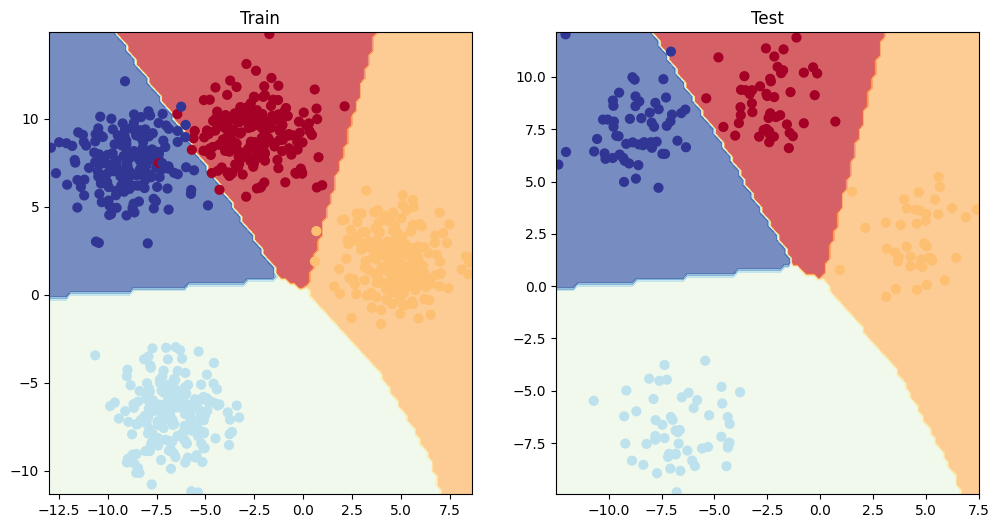

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

### more classification metrics

- accuracy
- precision
- recall
- F1-score
- confusion matrix
- classification report

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from torchmetrics import Accuracy
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)

14:00:00